<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/03_Class/2023-06-05-14wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports 

In [418]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예비학습

## 모티브: 클래스를 수정은 불편해

`-` 예시1: UpJump ver1

In [2]:
class UpJump:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1  
    def __repr__(self):
        return str(self.value)

In [3]:
a = UpJump()
a.up()

In [4]:
a

1

In [5]:
a.jump(2)

AttributeError: 'UpJump' object has no attribute 'jump'

- 점프는 아직 구현하지 않음.

`-` 예시2: UpJump ver2 

In [6]:
class UpJump_Ver2:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1  
    def jump(self,jump_size):
        self.value = self.value + jump_size
    def __repr__(self):
        return str(self.value)        

In [7]:
a = UpJump_Ver2()

In [8]:
a.up()

In [9]:
a.jump(2)

In [10]:
a

3

`-` 예시3: UpJump ver2의 다른 구현 

In [11]:
class UpJump_Ver2(UpJump):
    def jump(self,jump_size):
        self.value = self.value + jump_size    

In [12]:
a = UpJump_Ver2()

In [13]:
a.up()

In [14]:
a.jump(2)

In [15]:
a

3

## 꿀팁

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다. 

```Python
class 새로운_클래스_이름(수정할_클래스_이름): 
    def 수정_및_추가할_함수이름(self,...):
        ...
```

`-` 사용예시

In [16]:
class UpJump_Ver3(UpJump_Ver2):
    def __repr__(self):
        return '현재의 이 인스턴스의 value는 {}입니다.'.format(self.value)

In [17]:
a=UpJump_Ver3()

In [18]:
a

현재의 이 인스턴스의 value는 0입니다.

In [19]:
a.jump(50)

In [20]:
a

현재의 이 인스턴스의 value는 50입니다.

# 클래스공부 4단계: 파이썬의 비밀 (2)

## 비밀6: `__add__`

### ***motive***

`-` 모티브: 아래의 연산구조를 관찰하자. 

In [21]:
a=1
b=2 
a+b

3

`-` 아래의 연산구조를 관찰하자. 

In [22]:
a=1 
b=2 
a+b 

3

- a라는 인스턴스와 b라는 인스턴스를 +라는 기호가 연결하고 있다. 

`-` 이번에는 아래의 연산구조를 관찰하자.

In [23]:
a=[1,2]
b=[3,4]
a+b

[1, 2, 3, 4]

- a라는 인스턴스와 b라는 인스턴스를 +라는 기호가 연결하고 있다. 

`-` 동작이 다른 이유?

- 클래스를 배우기 이전: int자료형의 `+`는 "정수의 덧셈"을 의미하고 list자료형의 `+`는 "자료의 추가"를 의미한다. 
- 클래스를 배운 이후: 아마 클래스는 `+`라는 연산을 정의하는 숨겨진 메소드가 있을것이다. (print가 그랬듯이) 그리고 int클래스에서는 그 메소드를 "정수의 덧셈"이 되도록 정의하였고 list클래스에서는 그 메소드를 "자료의 추가"를 의미하도록 정의하였다. 

`-` 아래의 결과를 관찰

In [24]:
a=1
b=2

In [25]:
a.__add__(b)

3

In [26]:
b.__add__(a)

3

In [27]:
a=[1,2]
b=[3,4]

In [28]:
a.__add__(b)

[1, 2, 3, 4]

In [29]:
b.__add__(a)

[3, 4, 1, 2]

`-` 확인: a+b는 사실 내부적으로 `a.__add__(b)`의 축약구문이다. 

`-` 추측: 따라서 만약 `a.__add__(b)`의 기능을 바꾸면 (재정의하면) a+b의 기능도 바뀔 것이다. 

### ***Student_Ver2: `__add__`의 사용***

`-` Student 클래스 선언 

In [30]:
class Student:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print("입학을 축하합니다. 당신의 나이는 {}이고 현재 학기는 {}학기 입니다.".format(self.age,self.semester))
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age=self.age+0.5
        elif registration_status=='등록':
            self.age=self.age+0.5 
            self.semester= self.semester+1 
    def _repr_html_(self):
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

`-` 사용 

In [31]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [32]:
boram

In [33]:
boram + '등록'
boram

In [34]:
boram + '휴학'
boram

`-` 잘못된 사용 

In [35]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [36]:
boram + '등록'+ '휴학' + '등록' + '휴학'

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

- 에러가?

`-` 올바른 코드 

In [37]:
class Student_Ver2:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print("입학을 축하합니다. 당신의 나이는 {}이고 현재 학기는 {}학기 입니다.".format(self.age,self.semester))
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age = self.age+0.5
        elif registration_status=='등록':
            self.age = self.age+0.5 
            self.semester = self.semester+1 
        return self
    def _repr_html_(self):
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

In [39]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [40]:
boram + '등록'+ '휴학' + '등록' + '휴학'

### ***Student_Ver2의 다른구현1***

In [41]:
class Student_Ver2(Student):
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age = self.age+0.5
        elif registration_status=='등록':
            self.age = self.age+0.5 
            self.semester = self.semester+1 
        return self

In [42]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [43]:
boram + '등록'+ '휴학' + '등록' + '휴학'

### ***Student_Ver2의 다른구현2***

- 요거까지는 지금 몰라도 됩니다

In [44]:
class Student_Ver2(Student):
    def __add__(self,registration_status): 
        super().__add__(registration_status)
        return self

In [45]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [46]:
boram + '등록'+ '휴학' + '등록' + '휴학'

> 파이썬의 비밀6: `a+b`는 사실 `a.__add__(b)`의 축약형이다. 

## 비밀7: `__getitem__`

### ***motive***

In [47]:
a=[11,22,32]

In [48]:
a[0]

11

- 이거 좋아보인다? 

In [49]:
a.__getitem__(0)

11

- 이런거였어?

### ***RPS_Ver2: `__getitem__`의 사용***

In [53]:
class RPS:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
    def pick(self):
        self.actions.append(np.random.choice(self.candidate))        
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/>
        기록: {}
        """        
        return html_str.format(self.candidate,self.actions)

In [54]:
a = RPS(['가위','바위','보'])

In [55]:
a.pick()
a.pick()

In [56]:
a.actions

['바위', '가위']

In [57]:
a[0], a[1]

TypeError: 'RPS' object is not subscriptable

- 결과가 '가위', '바위'로 나오면 좋겠다.. 물론 지금은 불가능해

In [61]:
class RPS_Ver2(RPS):
    '''
    Ver1: init, pick, repr_html
    Ver2: getitem 추가 
    '''
    def __getitem__(self,item):
        return self.actions[item]

In [62]:
RPS_Ver2?

Init signature: RPS_Ver2(candidate)
Docstring:     
Ver1: init, pick, repr_html
Ver2: getitem 추가 
Type:           type
Subclasses:     

In [63]:
a = RPS_Ver2(['가위','바위','보'])

In [64]:
a.pick()
a.pick()
a.pick()

In [65]:
a

In [66]:
a[0]

'바위'

In [67]:
a[:2]

['바위', '바위']

> 파이썬의 비밀7: `a[0]`는 `a.__getitem__(0)`의 축약형이다. 

## 비밀8: `__setitem__`

### ***motive***

In [73]:
a = RPS_Ver2(['가위','바위'])
a

In [74]:
a.pick()
a.pick()
a

In [75]:
a[0]

'바위'

In [77]:
a[0] = '보' 

TypeError: 'RPS_Ver2' object does not support item assignment

- 경우에 따라서는 이런 문법이 필요하기도 하다.

### ***RPS_Ver3: `__setitem__` 사용*** 

`-` 관찰

In [108]:
lst = [1,2,3]

In [109]:
lst.__setitem__(0,11)

In [110]:
lst

[11, 2, 3]

`-` RPS예제

In [111]:
class RPS_Ver3(RPS_Ver2):
    def __setitem__(self,index,val):
        self.actions[index] = val

In [112]:
a=RPS_Ver3(['가위','바위','보'])

In [113]:
a.pick()

In [114]:
a

In [115]:
a[0]='가위'

In [116]:
a

> 파이썬의 비밀8: `a[0]=11`는 `a.__setitem__(0,11)`의 축약형이다. 


## 비밀9: `__len__`

### ***motive***

In [117]:
a= RPS_Ver3(['가위','바위','보'])
a

In [118]:
a.pick()
a.pick()
a.pick()

In [119]:
a

In [120]:
a[0],a[1],a[2]

('바위', '보', '보')

In [121]:
a.__len__()

AttributeError: 'RPS_Ver3' object has no attribute '__len__'

In [122]:
len(a)

TypeError: object of type 'RPS_Ver3' has no len()

### ***RPS_Ver4: `__len__` 의 사용***

In [123]:
class RPS_Ver4(RPS_Ver2):
    def __len__(self):
        return len(self.actions)

In [124]:
a = RPS_Ver4(['가위','바위','보'])
a

In [125]:
a.pick()
a.pick()
a.pick()
a.pick()

In [126]:
a

In [128]:
a.__len__()

4

In [127]:
len(a)

4

> 파이썬의 비밀9: `a.__len__()`는 `len(a)`의 축약형이다. 

## 비밀10: 비교연산자

### ***motive1***

In [137]:
a = RPS_Ver4(['가위'])
b = RPS_Ver4(['가위'])

In [138]:
a.pick()
b.pick()

In [139]:
a

In [140]:
b

In [142]:
a == b

False

- `가위 == 가위` 이면 True가 나오면 좋겠구만.. 

In [143]:
a[-1] == b[-1] 

True

- 이렇게 하면 되긴하지..

### ***RPS_Ver5: `__eq__` 의 사용***

`-` 관찰 

In [223]:
a = 1

In [225]:
a.__eq__(1)

True

In [226]:
a.__eq__(2)

False

`-` 구현 

In [189]:
class RPS_Ver5(RPS_Ver4):
    def __eq__(self,other):
        return self[-1] == other[-1]

In [190]:
a = RPS_Ver5(['가위','바위'])
b = RPS_Ver5(['가위','바위'])

`-` 1회 대결 

In [191]:
a.pick()
b.pick()

In [192]:
a

In [193]:
b

In [194]:
a == b

False

`-` 2회 대결 

In [195]:
a.pick()
b.pick()

In [196]:
a

In [197]:
b

In [198]:
a == b

True

`-` 3회 대결 

In [199]:
a.pick()
b.pick()

In [200]:
a

In [201]:
b

In [202]:
a == b

False

### ***motive2***

In [205]:
a[-1], b[-1]

('가위', '바위')

In [206]:
a > b

TypeError: '>' not supported between instances of 'RPS_Ver5' and 'RPS_Ver5'

- False 가 나오면 좋겟구만.. 

### ***RPS_Ver6: `__gt__` 의 사용***

`-` 관찰 

In [223]:
a = 1

In [227]:
a.__gt__(1)

False

In [228]:
a.__gt__(0)

True

`-` **예비학습**

In [210]:
[a[-1],b[-1]] 

['가위', '바위']

In [211]:
[a[-1],b[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

False

`-` 구현 

In [231]:
class RPS_Ver6(RPS_Ver5):
    def __gt__(self,other):
        return [self[-1],other[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

In [232]:
a = RPS_Ver6(['가위','바위','보'])
b = RPS_Ver6(['가위','바위','보'])

`-` 1회대결 

In [233]:
a.pick() 
b.pick()

In [234]:
a

In [235]:
b

In [236]:
a>b

True

`-` 2회대결 

In [237]:
a.pick() 
b.pick()

In [239]:
a

In [238]:
b

In [240]:
a>b

True

### ***motive3***

In [243]:
a

In [244]:
b

In [246]:
a>=b

TypeError: '>=' not supported between instances of 'RPS_Ver6' and 'RPS_Ver6'

- True로 나오면 좋겠구만..

In [247]:
a < b

False

- 이것도 정의 새로 해야겠는걸? 

### ***RPS_Ver7: `__ge__`, `__lt__`, `__le__` 의 사용***

`-` 관찰: 생략 

`-` 비교연산자 정리

|특수메소드|의미|
|:-:|:-:|
|`__eq__`|`self == other`|
|`__gt__`|`self > other`|
|`__lt__`|`self < other`|
|`__ge__`|`self >= other`|
|`__le__`|`self <= other`|

`-` 구현 

In [313]:
class RPS_Ver7(RPS_Ver6):
    def __ge__(self,other):
        return (self == other) or (self > other)
    def __lt__(self,other):
        return not (self >= other)
    def __le__(self,other):
        return (self == other) or (self < other)

In [319]:
a = RPS_Ver7(['가위','바위','보'])
b = RPS_Ver7(['가위','바위','보'])

In [320]:
a.pick()
b.pick()

In [321]:
a

In [322]:
b

In [323]:
a==b, a>b, a<b, a>=b, a<=b 

(True, False, False, True, True)

> 파이썬의 비밀10: `__eq__`, `__gt__`, `__lt__`, `__ge__`, `__le__`는 각각 `==`, `>`, `<`, `>=`, `<=` 를 재정의한다. 

## 비밀11: `__call__` $(\star\star\star)$

### ***함수공부***

`-` 다시 함수를 공부해봅시다. 

In [203]:
def f(x):
    return x+1 

In [204]:
f(3)

4

`-` 함수의 사용방법? 

- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음. 
- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴. 

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다. 

`-` 함수의 자료형? 

In [207]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_3296343/2907208198.py
Type:      function


- type이 function이다. 
- f는 function class의 instance이다. 
- 결국 f 역시 하나의 오브젝트에 불과하다. 

`-` 사실2: 함수도 결국 인스턴스이다. -> 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다. 

> "파이썬의 모든 것은 오브젝트이다." <-- 명언처럼 외우세여

### ***함수도 인스턴스다***

(예제1) 숫자입력, 함수출력 

In [362]:
def f(a):
    def _f(x):
        return (x-a)**2 
    return _f

In [363]:
g=f(10) # g(x)=(x-10)**2 

In [364]:
g(2) # (2-10)**2 = 64

64

- 해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를 리턴해주는 함수 

(예제1)의 다른표현: 익명함수 lambda 

표현1

In [365]:
def f(a):
    _f = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f 로 저장됨 
    return _f

In [366]:
g=f(10) # g(x)=(x-10)**2 

In [367]:
g(3) # (3-10)**2 = 49

49

표현2

In [368]:
def f(a):
    return lambda x: (x-a)**2 

In [369]:
g=f(10) # g(x)=(x-10)**2 

In [370]:
g(3) # (3-10)**2 = 49

49

- `lambda x: (x-a)**2` 는 $\text{lambda}(x) = (x-a)^2$의 느낌으로 기억하면 외우기 쉽다. 
- `lambda x: (x-a)**2` 는 "아직 이름이 없는 함수오브젝트를 (가칭 lambda 라고 하자) 만들고 기능은 `x`를 입력으로 하고 `(x-a)**2`를 출력하도록 하자" 라는 뜻으로 해석하면 된다. 

(예제2) 함수입력, 숫자출력 

In [371]:
def f(x):
    return x**2 

In [372]:
def d(f,x): # 함수를 입력을 받는 함수를 정의 
    h=0.000000000001
    return (f(x+h)-f(x))/h 

In [373]:
d(f,4) # f'(4) = 2*4 = 8

8.000711204658728

(예제3) 함수입력, 함수출력 

In [374]:
def f(x): 
    return x**2 

In [376]:
def derivate(f): 
    # step1: 함수오브젝트 f는 입력으로 받은상태 
    # step2: 함수오브젝트 f를 이용하여 df라는 함수를 정의 
    def df(x): 
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    # step3: 정의된 df를 리턴
    return df

In [377]:
ff = derivate(f)

In [378]:
ff(7) # f의 도함수

14.004797321831575

**원래함수 시각화**

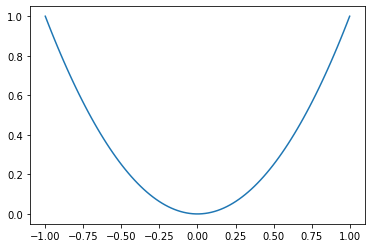

In [381]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

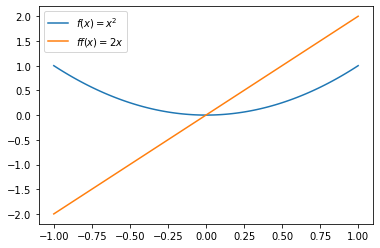

In [386]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제3)의 다른표현 

In [387]:
def f(x): 
    return x**2 

In [388]:
def derivate(f): 
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h 

In [389]:
ff = derivate(f)

In [390]:
ff(10)

20.00888343900442

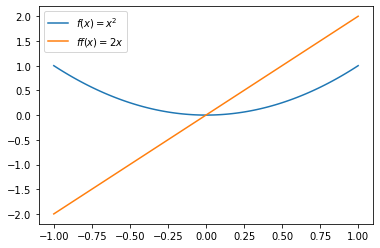

In [391]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제4) 함수들의 리스트 

In [392]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3] 
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [393]:
for f in flst:
    print(f(2))

2
4
8


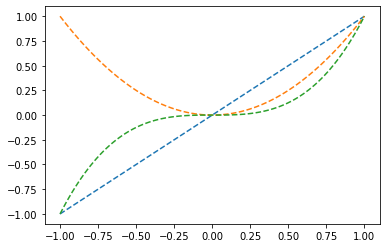

In [394]:
for f in flst: 
    plt.plot(x,f(x),'--')

위의코드는 아래와 같음 

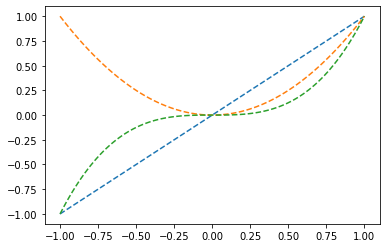

In [395]:
plt.plot(x,(lambda x: x)(x),'--')
plt.plot(x,(lambda x: x**2)(x),'--')
plt.plot(x,(lambda x: x**3)(x),'--')

### ***정리***

`-` 지금까지 개념 

- 함수: 변수를 입력으로 받아서 변수를 출력하는 개념 
- 변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로 사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘 쓰려면?)

- 변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은 오브젝트라는 의미)
- 변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와 같은 함수로 쓸 수 있음
- 함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도 있다. 

### ***callable object***

`-` 함수 오브젝트의 비밀? 

In [396]:
f = lambda x: x+1 

In [397]:
set(dir(f)) & {'__call__'}

{'__call__'}

- 함수 오브젝트에는 숨겨진 기능 `__call__`이 있다. 

In [398]:
f.__call__(3) # f(3)

4

In [399]:
f.__call__(4) # f(4)

5

- 여기에 우리가 정의한 내용이 있다. 

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다. 

In [400]:
class Klass: 
    def __init__(self):
        self.name='guebin'

In [401]:
a=Klass()

In [402]:
a()

TypeError: 'Klass' object is not callable

- a는 callable이 아니라고 한다. 

In [403]:
class Klass2(Klass): 
    def __call__(self):
        print(self.name)

In [404]:
b=Klass2()

In [405]:
b()

guebin


- b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
- Klass는 callable object를 만들지 못하지만 Klass2는 callable object를 만든다. 

`-` 클래스로 함수를 만들기 (=함수인스턴스를 찍어내는 클래스 설계)

In [406]:
class AddConstant: 
    def __init__(self,const):
        self.const = const 
    def __call__(self,x):
        return x + self.const

In [407]:
f = AddConstant(3) # callable object생성, f.const에는 3이 저장되어있음. 

In [408]:
f(5) # f.const 와 5를 더하는 기능을 수행, # 즉 f(x) = x+3 을 수행함

8

In [409]:
f(10) 

13

`-` 클래스도 그러고 보니까 `오브젝트` 아니었나? 

In [482]:
Student_Ver2?

Init signature: Student_Ver2(age=20.0, semester=0)
Docstring:      <no docstring>
Type:           type
Subclasses:     

- 이것도 type 이라는 또 다른 클래스에서 (클래스를 찍는 클래스) 찍힌 오브젝트이구나..

`-` 클래스 "오브젝트"도 함수 "오브젝트"처럼 `Student_Ver2()`와 같이 사용하면 인스턴스를 만들었음. -> `Student_Ver2.__call__()` 은 `Student_Ver2()`와 같은 역할을 할 것이다. 

***일반적인 구현에서 "클래스 $\to$ 인스턴스" 과정*** 

In [483]:
boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [484]:
boram + '등록' + '휴학' + '휴학'

***공부를 위해 call을 이용해본 "클래스 $\to$ 인스턴스" 과정*** 

In [485]:
boram = Student_Ver2.__call__(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [486]:
boram + '등록' + '휴학' + '휴학'

> 파이썬의 비밀11: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이 정의되어있는 오브젝트일 뿐이다. 

## 비밀12: `__iter__` ($\star\star\star\star\star$)

### ***for문의 복습***

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자. 

(예제1)

In [419]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


(예제2)

In [420]:
for i in (1,2,3,4): 
    print(i)

1
2
3
4


(예제3)

In [421]:
for i in '1234':
    print(i)

1
2
3
4


(예제4)

In [422]:
a=5 
for i in a:
    print(i) 

TypeError: 'int' object is not iterable

- 5라고 출력되어야 하지 않나?

`-` 의문1: 

```python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까? 

(예제5)

*상황1*: 우리가 아는 더블리스트

In [423]:
lst = [[1,2,3,4],[3,4,5,6]]
for l in lst: 
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]


*상황2*: 더블리스트를 데이터프레임으로 바꾸니까 for의 동작이 미묘하게 달라졌다. 

In [428]:
df=pd.DataFrame(lst)
df

,0,1,2,3
0,1,2,3,4
1,3,4,5,6


In [429]:
for i in df:
    print(i)

0
1
2
3


칼럼이름들이 나오는것 같음 -> 확인해보자. 

In [426]:
df.columns = pd.Index(['X'+str(i) for i in range(1,5)])
df

,X1,X2,X3,X4
0,1,2,3,4
1,3,4,5,6


In [427]:
for i in df: 
    print(i) 

X1
X2
X3
X4


`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

### ***for문의 동작원리***

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여 `__iter__`가 있는 object이다. 

```python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다. 

`-` 확인 

In [350]:
a=[1,2,3] 
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [351]:
a=1,2,3
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [352]:
a='123'
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [354]:
a=5
set(dir(a)) & {'__iter__'}

set()

- 예상대로 예제1~4에서는 int의 클래스의 instance만 `__iter__` 가 없다. 

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [449]:
lst = [1,2,3] 
lst 

[1, 2, 3]

In [450]:
lst[1] # 충실한 리스트

2

In [451]:
ltor = iter(lst)
#ltor = lst.__iter__() 
ltor

In [452]:
ltor[1] # 더이상 리스트가 아니다

TypeError: 'list_iterator' object is not subscriptable

In [453]:
ltor?

Type:        list_iterator
String form: <list_iterator object at 0x7f0994f1e4f0>
Docstring:   <no docstring>

`-` iterator가 되면 무엇이 좋은가? -> 숨겨진 기능 `__next__`가 열린다. 

In [454]:
set(dir(lst)) & {'__next__'}, set(dir(ltor)) & {'__next__'}

(set(), {'__next__'})

- lst에는 `__next__`가 없지만 ltor에는 있다!

`-` 그래서 `__next__`의 기능은? -> 원소를 차례대로 꺼내준다 + 더 이상 꺼낼 원소가 없으면 StopIteration Error를 발생시킨다. 

In [455]:
lst

[1, 2, 3]

In [456]:
ltor.__next__() 

1

In [457]:
ltor.__next__() 

2

In [458]:
ltor.__next__() 

3

In [459]:
ltor.__next__()

StopIteration: 

`-` for문의 동작원리 

```python
for i in something:
    print(i)
```

1. `something.__iter__()` 혹은 `iter(something)` 를 이용하여 something을 iterator로 만든다. (iterable object를 iterator로 만든다) 만약에 이미 something이 iterator 라면 아무일도 하지 않는다.^[사실 이미 something이 iterator인 경우에는 iter(something)를 하면 자기자신이 리턴된다.] 
2. 1의 결과로 만들어진 iterator 에서 `.__next__()`함수를 호출하고 결과를 i에 저장한뒤에 for문 블락안에 있는 내용 (들여쓰기 된 내용)을 실행한다. -> 반복
3. StopIteration 에러가 발생하면 for문을 멈춘다. 

`-` 아래의 ??? 자리에 올 수 있는 것이 iterable object가 아니라 iterator 자체일 경우

```python
for i in ???:
    print(i)
```

In [460]:
ltor = iter(lst)
for i in ltor:
    print(i)

1
2
3


- for문은 잘 돌아감 

In [464]:
ltor = iter(lst)
ltor

In [465]:
iter(ltor) # 이미 iterator인 상태에서는 iter를 써도 자기자신을 리턴한다.

`-` 요약
- iterable object는 숨겨진 기능으로 `__iter__`를 가진다. 
- iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서 정의상 iterator는 그 자체로 iterable object가 된다!

In [466]:
lst = [1,2,3]
ltor = iter(lst) 

In [467]:
set(dir(lst)) & {'__iter__', '__next__'}

{'__iter__'}

In [468]:
set(dir(ltor)) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를 만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다. 

In [470]:
df.columns = pd.Index(['X'+str(i) for i in range(1,5)])
df

,X1,X2,X3,X4
0,1,2,3,4
1,3,4,5,6


In [471]:
for i in df:
    print(i)

X1
X2
X3
X4


In [472]:
dftor=iter(df)
dftor.__next__()

'X1'

In [473]:
dftor.__next__()

'X2'

In [474]:
dftor.__next__()

'X3'

In [475]:
dftor.__next__()

'X4'

In [476]:
dftor.__next__()

StopIteration: 

### ***range()***

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [405]:
for i in range(5):
    print(i)

0
1
2
3
4


- range(5)가 도데체 무엇이길래? 

`-` `range(5)`의 정체는 그냥 iterable object이다. 

In [411]:
set(dir(range(5))) & {'__iter__','__next__'}

{'__iter__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다. 

In [415]:
rtor= iter(range(5))
rtor

In [416]:
set(dir(rtor)) &  {'__iter__','__next__'}

{'__iter__', '__next__'}

`-` for문에서 range(5)가 행동하는 방법? 

In [417]:
rtor = iter(range(5))

In [418]:
rtor.__next__()

0

In [419]:
rtor.__next__()

1

In [420]:
rtor.__next__()

2

In [421]:
rtor.__next__()

3

In [422]:
rtor.__next__()

4

In [423]:
rtor.__next__()

StopIteration: 

### ***zip***

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다. 

In [424]:
for i in zip([1,2,3],'abc'):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


- zip은 뭐지?

In [425]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다. 

In [428]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

{'__iter__', '__next__'}

- `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그자체로 iterator 였다!

In [429]:
z= zip([1,2,3],'abc')

In [430]:
z.__next__()

(1, 'a')

In [431]:
z.__next__()

(2, 'b')

In [432]:
z.__next__()

(3, 'c')

In [433]:
z.__next__()

StopIteration: 

***또다른 이해: 그러고보니까 `zip([1,2,3],'abc')`은 뭐하는 문법이지?***

In [489]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     

- 너 클래스였어? 

In [508]:
iterator_from_zip = zip.__call__([1,2,3],'abc')

In [509]:
for i,j in iterator_from_zip:
    print(i,j)

1 a
2 b
3 c


> 파이썬의 작은 비밀: zip은 iterator를 찍어내는 클래스이다. 

### ***enumerate***

`-` zip의 짝궁으로 enumerate가 있음 

In [510]:
for i in enumerate('abc'):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.

In [512]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

- iterator 였군 

In [514]:
iterator = enumerate('abc')

In [515]:
next(iterator)

(0, 'a')

In [516]:
next(iterator)

(1, 'b')

In [517]:
next(iterator)

(2, 'c')

In [518]:
next(iterator)

StopIteration: 

`-` 참고: enumerate 는 클래스임 

In [519]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     

> 파이썬의 작은 비밀: enumerate 역시 iterator를 찍어내는 클래스다. 

### ***사용자정의 이터레이터***

`-` 내가 이터레이터를 만들어보자. 

In [520]:
class RPS_ITER: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self): 
        self.candidate = ["묵","찌","빠"] 
    def __iter__(self):
        return self 
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [521]:
a= RPS_ITER()

In [522]:
set(dir(a)) & {'__iter__', '__next__'} # a는 이터레이터!

{'__iter__', '__next__'}

In [523]:
a.__next__()

'묵'

In [524]:
a.__next__()

'빠'

In [525]:
a.__next__()

'빠'

In [526]:
a.__next__()

'묵'

In [528]:
for i in a:
    print(i)

묵
빠
찌가 나와서 for문을 멈춥니다


## 비밀을 알아서 좋은점

### ***파이썬의 에러메시지 이해***

TypeError: 타입이 맞지 않는 연산을 수행하려고 할 때 발생합니다. 예를 들어, 숫자와 문자열을 더하려고 할 때 발생합니다.

In [25]:
result = 10 + "20"  # TypeError: unsupported operand type(s) for +: 'int' and 'str'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

SyntaxError: 코드의 구문이 잘못되었을 때 발생합니다. 주로 오타, 괄호 불일치, 콜론(:) 빠뜨림 등의 문제로 인해 발생합니다.

In [23]:
if x == 5
    print("x is equal to 5")  # SyntaxError: invalid syntax

SyntaxError: invalid syntax (<ipython-input-23-5259b3c47c58>, line 1)

NameError: 정의되지 않은 변수나 함수를 사용하려고 할 때 발생합니다. 변수나 함수를 정의한 후에 사용해야 합니다.

In [24]:
print(unknown_variable)  # NameError: name 'unknown_variable' is not defined

NameError: name 'unknown_variable' is not defined

ValueError: 함수나 메서드에 전달되는 인자의 값이 올바르지 않을 때 발생합니다. 타입은 올바르지만 범위나 조건에 맞지 않는 값이 전달된 경우에 해당합니다.

In [31]:
int_value = int("abc")  # ValueError: invalid literal for int() with base 10: 'abc'

ValueError: invalid literal for int() with base 10: 'abc'

AttributeError: 객체가 속성(attribute)이나 메서드(method)를 가지고 있지 않을 때 발생합니다.

In [32]:
my_list = [1, 2, 3]
my_list.append(4)
my_list.upper()  # AttributeError: 'list' object has no attribute 'upper'

AttributeError: 'list' object has no attribute 'upper'

ImportError: 모듈을 임포트하는 과정에서 문제가 발생할 때 발생합니다. 임포트하려는 모듈이 존재하지 않거나, 임포트 경로 설정이 잘못된 경우에 해당합니다.

In [33]:
import non_existent_module  # ImportError: No module named 'non_existent_module'

ModuleNotFoundError: No module named 'non_existent_module'

IOError: 파일 입출력 작업 중에 발생하는 에러입니다. 파일이 존재하지 않거나, 파일에 쓰기 권한이 없는 경우 등에 해당합니다.

In [34]:
file = open('file.txt', 'r')  # IOError: [Errno 2] No such file or directory: 'file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

KeyboardInterrupt: 사용자가 Ctrl+C를 눌러 프로그램의 실행을 중단할 때 발생합니다.

In [35]:
while True:
    pass  # 무한 루프
# KeyboardInterrupt: 


KeyboardInterrupt: 

MemoryError: 메모리 부족으로 인해 객체를 생성하거나 작업을 수행할 수 없을 때 발생합니다.

In [40]:
big_list = [0] * (10 ** 100)  # MemoryError

OverflowError: cannot fit 'int' into an index-sized integer

IndexError: 유효하지 않은 인덱스를 사용하여 시퀀스(리스트, 튜플, 문자열 등)의 요소에 접근하려고 할 때 발생합니다.

In [27]:
my_list = [1, 2, 3]
print(my_list[5])  # IndexError: list index out of range

IndexError: list index out of range

KeyError: 딕셔너리에서 존재하지 않는 키를 사용하여 요소에 접근하려고 할 때 발생합니다.

In [28]:
my_dict = {'name': 'John', 'age': 25}
print(my_dict['address'])  # KeyError: 'address'

KeyError: 'address'

FileNotFoundError: 존재하지 않는 파일을 열려고 할 때 발생합니다.

In [29]:
file = open('nonexistent_file.txt')  # FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

ZeroDivisionError: 0으로 나누기 연산을 수행하려고 할 때 발생합니다.

In [30]:
result = 10 / 0  # ZeroDivisionError: division by zero

ZeroDivisionError: division by zero

### ***`TypeError`에 대한 심층분석***

`-` `.__add__` 가 올바르게 정의되지 않아서 생기는 경우

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[37], line 1
----> 1 boram + '등록'+ '휴학' + '등록' + '휴학'

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'
```

`-` `.__getitem__`이 정의되지 않은 오브젝트에서 인덱싱을 시도할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[57], line 1
----> 1 a[0], a[1]

TypeError: 'RPS' object is not subscriptable
```

`-` `.__setitem__`이 정의되지 않은 오브젝트에서 할당을 시도할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[77], line 1
----> 1 a[0] = '보' 

TypeError: 'RPS_Ver2' object does not support item assignment
```

`-` `.__len__` 이 정의되지 않은 오브젝트에서 len을 이용할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[122], line 1
----> 1 len(a)

TypeError: object of type 'RPS_Ver3' has no len()

```

`-` `.__call__`이 정의되지 않은 오브젝트를 함수처럼 이용하려 할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[402], line 1
----> 1 a()

TypeError: 'Klass' object is not callable
```

`-` `.__iter__`가 정의되지 않은 오브젝트에 반복문을 적용하려 하면 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[422], line 2
      1 a=5 
----> 2 for i in a:
      3     print(i) 

TypeError: 'int' object is not iterable
```